## Import Libraries

In [2]:
import requests
import pandas as pd
import numpy as np

import time
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

## Download the data

In [3]:
# Assign the URL
URL_state = 'https://covidtracking.com/api/states/daily'

# Create Request object
res = requests.get(URL_state)
res.status_code

# Create Dataframe of daily state data
states = pd.DataFrame(res.json())

In [4]:
# Examine our columns
states.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

## Clean the Data
### Change the date column to the index

In [5]:
# Convert date column to string (from int64)
states['date'] = states['date'].astype(str)

# Convert date column to datedate
states['date'] = pd.to_datetime(states['date'], format = '%Y%m%d')

# Set the index of our dataframe to be state and date
states.set_index(keys = ['state','date'], inplace = True)

# Sort the index
states.sort_index()

positive  negative  pending  hospitalizedCurrently  \
state date                                                             
AK    2020-03-06       0.0       8.0      1.0                    NaN   
      2020-03-07       0.0      12.0      2.0                    NaN   
      2020-03-08       0.0      14.0      6.0                    NaN   
      2020-03-09       0.0      23.0      9.0                    NaN   
      2020-03-10       0.0      23.0      9.0                    NaN   
...                    ...       ...      ...                    ...   
WY    2020-05-08     635.0   11403.0      NaN                    9.0   
      2020-05-09     644.0   11403.0      NaN                   12.0   
      2020-05-10     661.0   11403.0      NaN                   12.0   
      2020-05-11     662.0   11403.0      NaN                   12.0   
      2020-05-12     675.0   14384.0      NaN                   10.0   

                  hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
state date                                                                  
AK    2020-03-06                     NaN             NaN              NaN   
      2020-03-07                     NaN             NaN              NaN   
      2020-03-08                     NaN             NaN              NaN   
      2020-03-09                     NaN             NaN              NaN   
      2020-03-10                     NaN             NaN              NaN   
...                                  ...             ...              ...   
WY    2020-05-08                    60.0             NaN              NaN   
      2020-05-09                    64.0             NaN              NaN   
      2020-05-10                    65.0             NaN              NaN   
      2020-05-11                    66.0             NaN              NaN   
      2020-05-12                    67.0             NaN              NaN   

                  onVentilatorCurrently  onVentilatorCumulative  recovered  \
state date                                                                   
AK    2020-03-06                    NaN                     NaN        NaN   
      2020-03-07                    NaN                     NaN        NaN   
      2020-03-08                    NaN                     NaN        NaN   
      2020-03-09                    NaN                     NaN        NaN   
      2020-03-10                    NaN                     NaN        NaN   
...                                 ...                     ...        ...   
WY    2020-05-08                    NaN                     NaN      428.0   
      2020-05-09                    NaN                     NaN      438.0   
      2020-05-10                    NaN                     NaN      443.0   
      2020-05-11                    NaN                     NaN      443.0   
      2020-05-12                    NaN                     NaN      477.0   

                  ... hospitalized  total totalTestResults posNeg  fips  \
state date        ...                                                     
AK    2020-03-06  ...          NaN      9                8      8    02   
      2020-03-07  ...          NaN     14               12     12    02   
      2020-03-08  ...          NaN     20               14     14    02   
      2020-03-09  ...          NaN     32               23     23    02   
      2020-03-10  ...          NaN     32               23     23    02   
...               ...          ...    ...              ...    ...   ...   
WY    2020-05-08  ...         60.0  12038            12038  12038    56   
      2020-05-09  ...         64.0  12047            12047  12047    56   
      2020-05-10  ...         65.0  12064            12064  12064    56   
      2020-05-11  ...         66.0  12065            12065  12065    56   
      2020-05-12  ...         67.0  15059            15059  15059    56   

                  deathIncrease  hospitalizedIncrease  negativeIncrease  \
state date   

In [29]:
AZ = states.loc['AZ', :]['2020-05-10']
AZ_positive = int(AZ['positive'])
AZ_positive

11119

In [6]:
states.loc['CA'].head(2)

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-05-11,67939.0,923958.0,NaN,4549.0,NaN,1329.0,NaN,NaN,NaN,NaN,...,NaN,991897,991897,991897,06,25.0,0.0,34974.0,1259.0,36233.0
2020-05-10,66680.0,888984.0,NaN,4555.0,NaN,1328.0,NaN,NaN,NaN,NaN,...,NaN,955664,955664,955664,06,67.0,0.0,40975.0,2119.0,43094.0


### Plotting

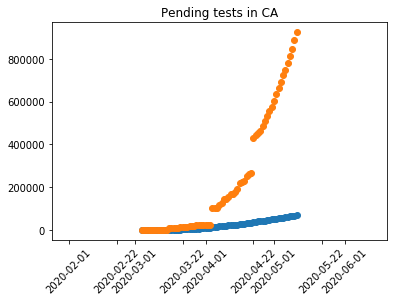

In [7]:
def plot_state_deaths(state):
    plt.scatter(x = states.loc[state].index, y = states.loc[state]['death'])
    plt.title(f'Cummulative deaths in {state}')
    plt.xticks(rotation = 45)
    #plt.xlim('2020-03-01', '2020-05-11')
    
    
#plot_state_deaths('NY')

def plot_state_hospitalization(state):
    plt.scatter(x = states.loc[state].index, y = states.loc[state]['hospitalizedCurrently'])
    plt.title(f'Cummulative hospitalizations in {state}')
    plt.xticks(rotation = 45)
#plot_state_hospitalization('OK')


def plot_state_hospitalization(state):
    plt.scatter(x = states.loc[state].index, y = states.loc[state,'positive'])
    plt.scatter(x = states.loc[state].index, y = states.loc[state,'negative'])
    
    plt.title(f'Pending tests in {state}')
    plt.xticks(rotation = 45)
    
plot_state_hospitalization('CA')


In [8]:
states.columns

Index(['positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked', 'death',
       'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [9]:
states.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,3754.000000,3582.000000,724.000000,1520.000000,1500.000000,779.000000,313.000000,627.000000,102.000000,1366.000000,3043.000000,1500.000000,3.769000e+03,3.769000e+03,3.769000e+03,3713.000000,3713.000000,3713.000000,3713.000000,3713.000000
mean,9048.721364,45947.855667,1373.430939,1388.394737,2482.258000,611.546855,369.051118,319.942584,106.598039,2906.631772,542.340453,2482.258000,5.294468e+04,5.268085e+04,5.268085e+04,20.228117,40.994883,2168.085914,360.974414,2526.552114
std,29280.637131,90660.254017,7133.652330,2670.929690,8999.758521,954.991384,352.876055,428.955917,67.344285,7716.377236,1891.504635,8999.758521,1.124035e+05,1.123170e+05,1.123170e+05,67.173624,249.707475,5192.979773,935.433820,5681.638602
min,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,6.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-201.000000,-181.000000,-5174.000000,-383.000000,-9269.000000
25%,72.000000,1217.500000,9.000000,86.000000,101.750000,91.500000,86.000000,28.500000,57.000000,168.250000,7.000000,101.750000,8.080000e+02,7.680000e+02,7.680000e+02,0.000000,0.000000,25.000000,7.000000,62.000000
50%,1043.500000,14576.500000,44.500000,371.000000,427.500000,166.000000,260.000000,137.000000,95.000000,583.500000,53.000000,427.500000,1.411300e+04,1.411300e+04,1.411300e+04,2.000000,0.000000,598.000000,72.000000,698.000000
75%,5895.250000,50444.500000,337.500000,1514.250000,1265.250000,876.500000,514.000000,497.000000,136.250000,1996.000000,277.000000,1265.250000,5.546200e+04,5.445300e+04,5.445300e+04,11.000000,7.000000,2351.000000,310.000000,2730.000000
max,337055.000000,923958.000000,64400.000000,18825.000000,73143.000000,5225.000000,1414.000000,2425.000000,276.000000,58950.000000,21640.000000,73143.000000,1.204651e+06,1.204651e+06,1.204651e+06,951.000000,7758.000000,163092.000000,11571.000000,165227.000000


In [10]:
states.loc['NY','posNeg']

date
2020-05-11    1204651
2020-05-10    1182998
2020-05-09    1153768
2020-05-08    1121543
2020-05-07    1089916
               ...   
2020-03-08        197
2020-03-07        168
2020-03-06        125
2020-03-05         98
2020-03-04         54
Name: posNeg, Length: 69, dtype: int64

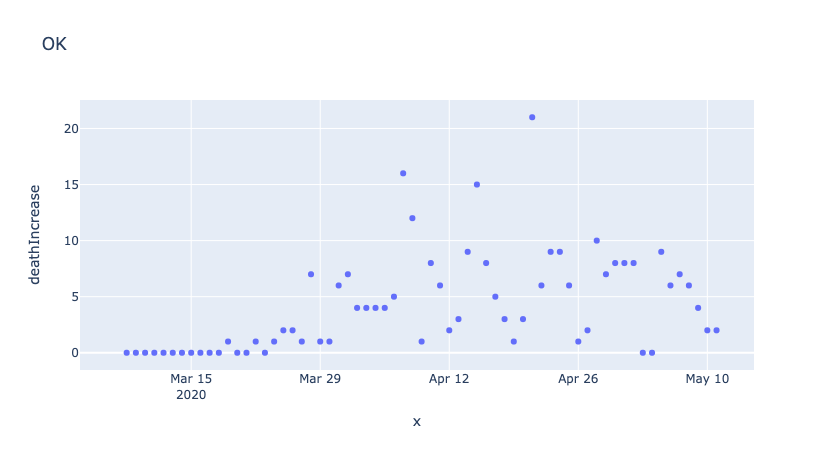

NameError: name 'fit2' is not defined

In [26]:

def plotly_states(state):
    fig = px.scatter(states.loc[state], x=states.loc[state].index, 
                     y='deathIncrease',
                     hover_name = 'deathIncrease', 
                     title = f' {state}')
    fig2 = px.scatter(states.loc[state], x=states.loc[state].index, 
                     y='death',
                     hover_name = 'death', 
                     title = f' {state}')
    fig.show()
    fit2.show()
plotly_states('OK')


# SCRATCH AREA
---
---
---

## Clean some data

In [183]:
states.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [112]:
# San Mateo has an errant lat coordinate
# THis comes from the LAtimes data
#   df.loc[26662, 'x'] = -122.481

In [181]:
plt.scatter(df.x, df.y, c = df.confirmed)

AttributeError: 'DataFrame' object has no attribute 'x'

In [184]:

url = 'https://covidtracking.com/api/v1/states/daily.csv'
states = pd.read_csv(url,
                     #usecols=['date', 'state', 'positive'],
                     parse_dates=['date'],
                     index_col=['state', 'date'],
                     squeeze=True).sort_index()

In [185]:
states.columns

Index(['positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked', 'death',
       'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [57]:
states.shape

(3769, 25)

In [48]:
states.index

MultiIndex([('AK', '2020-03-06'),
            ('AK', '2020-03-07'),
            ('AK', '2020-03-08'),
            ('AK', '2020-03-09'),
            ('AK', '2020-03-10'),
            ('AK', '2020-03-11'),
            ('AK', '2020-03-12'),
            ('AK', '2020-03-13'),
            ('AK', '2020-03-14'),
            ('AK', '2020-03-15'),
            ...
            ('WY', '2020-05-02'),
            ('WY', '2020-05-03'),
            ('WY', '2020-05-04'),
            ('WY', '2020-05-05'),
            ('WY', '2020-05-06'),
            ('WY', '2020-05-07'),
            ('WY', '2020-05-08'),
            ('WY', '2020-05-09'),
            ('WY', '2020-05-10'),
            ('WY', '2020-05-11')],
           names=['state', 'date'], length=3769)

In [55]:
states[['positive', 'onVentilatorCurrently']]

positive  onVentilatorCurrently
state date                                       
AK    2020-03-06       0.0                    NaN
      2020-03-07       0.0                    NaN
      2020-03-08       0.0                    NaN
      2020-03-09       0.0                    NaN
      2020-03-10       0.0                    NaN
...                    ...                    ...
WY    2020-05-07     631.0                    NaN
      2020-05-08     635.0                    NaN
      2020-05-09     644.0                    NaN
      2020-05-10     661.0                    NaN
      2020-05-11     662.0                    NaN

[3769 rows x 2 columns]

In [99]:
place_url = 'https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv'
df = pd.read_csv(place_url, error_bad_lines=False)
df.head()

,date,county,fips,place,confirmed_cases,note,x,y
0,2020-03-16,Los Angeles,37,Alhambra,2,NaN,-118.135504,34.083961
1,2020-03-16,Los Angeles,37,Arcadia,1,NaN,-118.037297,34.134186
2,2020-03-16,Los Angeles,37,Beverly Hills,1,NaN,-118.402109,34.078543
3,2020-03-16,Los Angeles,37,Boyle Heights,5,NaN,-118.205330,34.038150
4,2020-03-16,Los Angeles,37,Carson,1,NaN,-118.255878,33.837391
